In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 0.5
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 28
    #'font.serif': 'Computer Modern Roman'
}
matplotlib.rcParams.update(mplparams)

import os
import pandas as pd




In [2]:
import os
import pandas as pd

def normalize_name(name):
    return name.replace("–", "-").replace("−", "-").strip()


def read_upper_limits(pipeline_name, target_name, base_path="."):
    """
    Returns dataframe with columns ['f(Hz)', target_column]
    for SHV, BSD, Weave, PyStoch_best, PyStoch_worst, DHV.
    """
    
    target_name = normalize_name(target_name)


    dhv_groups = {
        "12hr": [
            "G65.7+1.2",
            "G189.1+3.0",
            "G353.6-0.7",
        ],
        "9hr": [
            "G18.9-1.1",
            "G39.2-0.3",
            "G93.3+6.9",
            "G266.2-1.2",
        ],
    }

    multi_column_pipelines = {
        "BSD",
        "Weave",
        "PyStoch_best",
        "PyStoch_worst",
    }

    # ---------------------------------------------------------
    # filename + target column
    # ---------------------------------------------------------

    if pipeline_name == "SHV":
        filename = f"ULs_SHV_{target_name}.txt"
        target_column = target_name

    elif pipeline_name in multi_column_pipelines:
        filename = f"ULs_{pipeline_name}_all_targets.txt"
        target_column = target_name

    elif pipeline_name == "DHV":
        # determine group
        group_found = None
        for group, targets in dhv_groups.items():
            if target_name in targets:
                group_found = group
                break

        if group_found is None:
            raise ValueError(f"Target '{target_name}' not valid for DHV")

        filename = f"ULs_DHV_Tcoh_{group_found}.txt"

        # grouped header name
        if group_found == "12hr":
            target_column = "G65.7+1.2/G189.1+3.0/G353.6-0.7"
        else:
            target_column = "G18.9-1.1/G39.2-0.3/G93.3+6.9/G266.2-1.2"

    else:
        raise ValueError(f"Pipeline '{pipeline_name}' not recognized")

    filepath = os.path.join(base_path, filename)

    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

    df = pd.read_csv(filepath, sep=r"\s+")
    df.columns = [normalize_name(c) for c in df.columns]
    target_column = normalize_name(target_column)

    if "f(Hz)" not in df.columns:
        raise ValueError(f"'f(Hz)' column not found in {filename}")

    if target_column not in df.columns:
        raise ValueError(
            f"Column '{target_column}' not found in {filename}"
        )

    # ---------------------------------------------------------
    # Return frequency + UL column
    # ---------------------------------------------------------
    return df[["f(Hz)", target_column]]


In [3]:

#W = pd.read_csv("ULs_Weave_all_targets.txt", sep=r"\s+")
#print(W.columns.tolist())

In [4]:
#read_upper_limits("Weave", 'G266.2–1.2')

In [5]:
def plot_pipeline(ax, pipeline_name, target_name, base_path=".", **plot_kwargs):
    """
    Reads UL data and plots it on the provided axis.
    Automatically sets label as 'pipeline / target'.
    """

    df = read_upper_limits(pipeline_name, target_name, base_path)

    f = df["f(Hz)"]
    h0 = df.iloc[:, 1]

    label = f"{pipeline_name} / {target_name}"

    ax.plot(
        f,
        h0,
        label=label,
        **plot_kwargs
    )


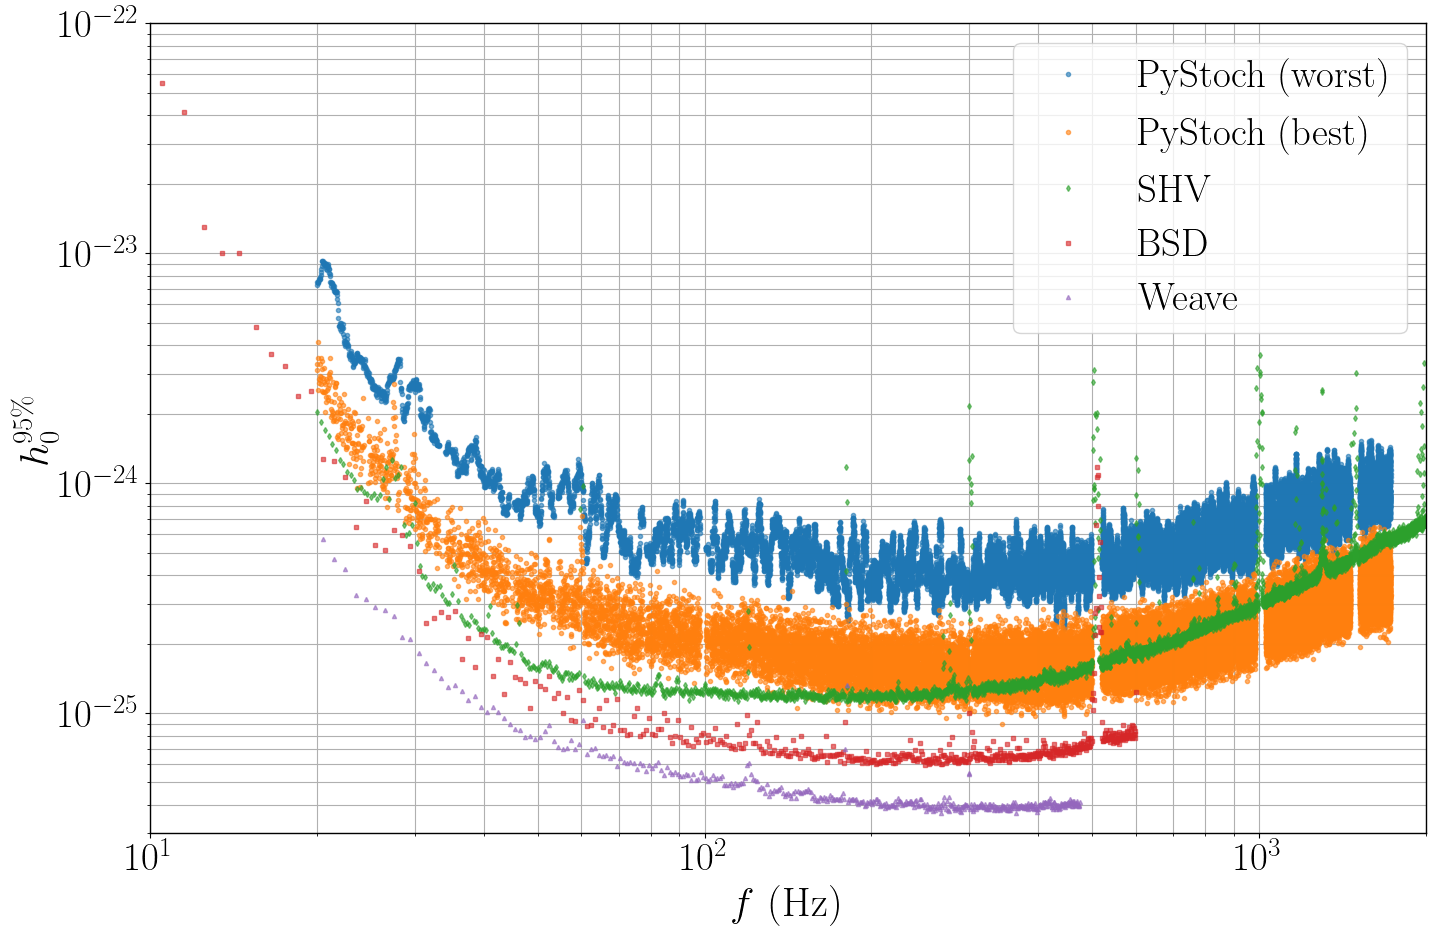

In [14]:
import matplotlib.pyplot as plt

target = "G266.2–1.2"

ax = plt.figure(figsize=(15, 10)).gca()

plot_pipeline(ax, "PyStoch_worst", target,
              linestyle='', marker='o', markersize=3, alpha=0.6)
plot_pipeline(ax, "PyStoch_best", target,
              linestyle='', marker='o', markersize=3, alpha=0.6)
plot_pipeline(ax, "SHV", target,
              linestyle='', marker='d', markersize=3, alpha=0.6)
plot_pipeline(ax, "BSD", target,
              linestyle='', marker='s', markersize=3, alpha=0.6)
plot_pipeline(ax, "Weave", target,
              linestyle='', marker='^', markersize=3, alpha=0.6)



#ax.set_xticks(np.arange(50,338,50))
ax.set_xlim(10,2000)
ax.set_ylim(3e-26,1e-22)
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc=1, markerscale=1, handlelength=1, borderaxespad=1, frameon=True, prop={'size':25}, numpoints=1)
#uncomment to reproduce Fig. 2
#handles, labels = plt.gca().get_legend_handles_labels()
#new_labels = ["PyStoch (worst)", "PyStoch (best)", "SHV", "BSD", "Weave"]
#plt.legend(handles, new_labels)

ax.set_xlabel(r'$f$ (Hz)', size=30, labelpad=5)
ax.set_ylabel(r'$h_{0}^{95\%}$', size=30, labelpad=0)
ax.grid(True, which = "both")

#plt.savefig('.pdf')
plt.tight_layout()

plt.savefig('UL_velajr.png', dpi=300)
#plt.savefig('parspace_velajr.eps', format='eps')
#ax.set_rasterized(True)
plt.savefig('UL_velajr.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
#plt.savefig("figure.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.show()